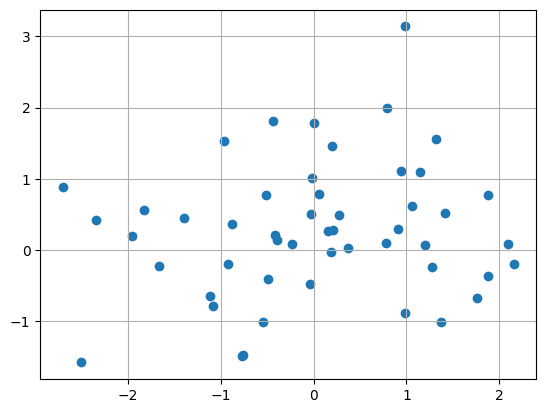

correlation: PearsonRResult(statistic=0.14659691529610558, pvalue=0.30968667231093916)


In [1]:
from scipy import stats
import matplotlib.pyplot as plt

def cortest(corr, lenX):
    #t value
    t = corr[0] * ((len(X) - 2) / (1 - corr[0]**2))**0.5
    print("data: x and y")
    print("t = {}, df = {}, p-value = {}".format(round(t,5), len(X)-2, round(stats.t.sf(np.abs(t), 48)*2,5)))

    # Use the Fisher transformation to get z
    z = np.arctanh(corr[0])
    #print("z value: {}".format(z))

    # And, the sigma value i.e standard error
    sigma = (1/((len(X)-3)**0.5))
    #print("sigma value: {}".format(sigma))

    # Get normal 95% interval probability density function for normal continuous random variable apply two-sided conditional formula
    cint = z + np.array([-1, 1]) * sigma * stats.norm.ppf((1+0.95)/2)
    
    #Finally take hyperbolic tangent to get interval values for 95%
    interval = np.tanh(cint)
    
    if corr != 0:
        print("alternative hypothesis: true correlation is not equal to 0")
    print("95 percent confidence interval:")
    print(interval)
    print("sample estimates:")
    print("cor")
    print(corr[0])

# так вычисляем корреляцию
X = stats.norm.rvs(loc=0, scale=1, size=50)
Y = stats.norm.rvs(loc=0, scale=1, size=50)
corr = stats.pearsonr(X, Y)

# так строим scatter plot
plt.scatter(X,Y)
plt.grid()
plt.show()

print("correlation: {}".format(corr))


(Pearson's correlation coefficient, 2-tailed p-value) = PearsonRResult(statistic=0.9644157498493688, pvalue=7.635073836146667e-12)


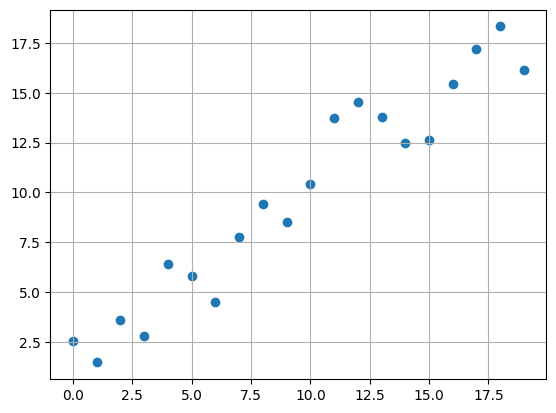

data: x and y
t = 15.47587, df = 18, p-value = 0.00000
z value: 2.005523511652791
sigma value (i.e standard error): 0.24253562503633297
  Отклоняем 0 гипотезу в пользу альтернативной: коэффициент корелляции в генеральной совокупности != 0. p_val < 0.05
95 percent confidence interval:[0.91045238 0.98609627]
PearsonCorellation: 0.9644157498493688


In [7]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import random as r

def cortest(x,y):
    assert len(x)==len(y)
    
    #t value
    cor_pearson = stats.pearsonr(x, y)[0]
    df = len(x)-2
    
    t = cor_pearson * ((len(x) - 2) / (1 - cor_pearson**2))**0.5
    p_val = stats.t.sf(np.abs(t), df)*2
    print("data: x and y")
    print(f"t = {round(t,5)}, df = {df}, p-value = {p_val:.5f}")

    # Use the Fisher transformation to get z
    z = np.arctanh(cor_pearson)
    print("z value: {}".format(z))

    # And, the sigma value i.e standard error
    sigma = (1/((len(x)-3)**0.5))
    print("sigma value (i.e standard error): {}".format(sigma))

    # Get normal 95% interval probability density function for normal continuous random variable apply two-sided conditional formula
    cint = z + np.array([-1, 1]) * sigma * stats.norm.ppf((1+0.95)/2)
    
    #Finally take hyperbolic tangent to get interval values for 95%
    interval = np.tanh(cint)
    
    if p_val < 0.05:
        print("  Отклоняем 0 гипотезу в пользу альтернативной: коэффициент корелляции в генеральной совокупности != 0. p_val < 0.05")
    else:
        print("  Не можем отклонить 0 гипотезу: коэффициент корелляции в генеральной совокупности = 0. p_val >= 0.05")
        
    print(f"95 percent confidence interval:{interval}")
    print(f"PearsonCorellation: {cor_pearson}")

# ==================================================================  
# функция имитирущая случаные факторы
# р - настолько существенным будет случайный фактор
def randomize(arr, p):
    alpha = np.max(arr) - np.min(arr)
    res = np.zeros(arr.shape)
    for i, v in enumerate(arr):
        sign = 1 if r.choice([True, False]) else -1
        res[i] = v + sign*alpha*r.random()*p
    return res
    
# ==================================================================    

# создаем пару x и y

x = np.array(range(30))
y = randomize(x, 0.1) # чем ближе к 0 значение, тем менее случайными будут значения y и выше будет корелляция

n = 20 # чем меньшее кол-во точек берем в пример, тем менее уверенные значения получаем
a,b = x[:n],y[:n]    
pearson_corr = stats.pearsonr(a, b)
print(f"(Pearson's correlation coefficient, 2-tailed p-value) = {pearson_corr}")

# cтроим scatter plot
plt.scatter(a,b)
plt.grid()
plt.show()

cortest(a,b)

(Pearson's correlation coefficient, 2-tailed p-value) = PearsonRResult(statistic=-1.0, pvalue=0.0)


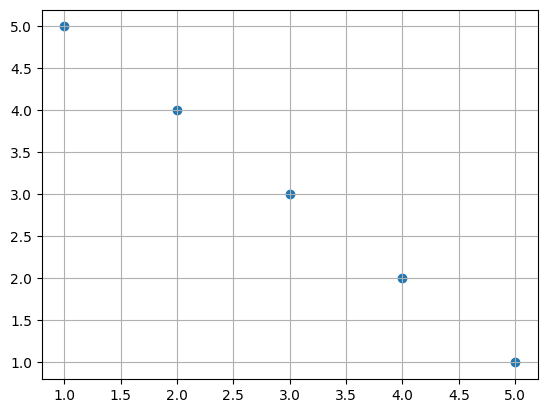

data: x and y
t = -inf, df = 3, p-value = 0.00000
z value: -inf
sigma value (i.e standard error): 0.7071067811865475
  Отклоняем 0 гипотезу в пользу альтернативной: коэффициент корелляции в генеральной совокупности != 0. p_val < 0.05
95 percent confidence interval:[-1. -1.]
PearsonCorellation: -1.0


C:\Users\Asus\AppData\Local\Temp\ipykernel_11820\1777632094.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  t = cor_pearson * ((len(x) - 2) / (1 - cor_pearson**2))**0.5
C:\Users\Asus\AppData\Local\Temp\ipykernel_11820\1777632094.py:19: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(cor_pearson)


In [9]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import random as r

def cortest(x,y):
    assert len(x)==len(y)
    
    #t value
    cor_pearson = stats.pearsonr(x, y)[0]
    df = len(x)-2
    
    t = cor_pearson * ((len(x) - 2) / (1 - cor_pearson**2))**0.5
    p_val = stats.t.sf(np.abs(t), df)*2
    print("data: x and y")
    print(f"t = {round(t,5)}, df = {df}, p-value = {p_val:.5f}")

    # Use the Fisher transformation to get z
    z = np.arctanh(cor_pearson)
    print("z value: {}".format(z))

    # And, the sigma value i.e standard error
    sigma = (1/((len(x)-3)**0.5))
    print("sigma value (i.e standard error): {}".format(sigma))

    # Get normal 95% interval probability density function for normal continuous random variable apply two-sided conditional formula
    cint = z + np.array([-1, 1]) * sigma * stats.norm.ppf((1+0.95)/2)
    
    #Finally take hyperbolic tangent to get interval values for 95%
    interval = np.tanh(cint)
    
    if p_val < 0.05:
        print("  Отклоняем 0 гипотезу в пользу альтернативной: коэффициент корелляции в генеральной совокупности != 0. p_val < 0.05")
    else:
        print("  Не можем отклонить 0 гипотезу: коэффициент корелляции в генеральной совокупности = 0. p_val >= 0.05")
        
    print(f"95 percent confidence interval:{interval}")
    print(f"PearsonCorellation: {cor_pearson}")

# ==================================================================  
# функция имитирущая случаные факторы
# р - настолько существенным будет случайный фактор
def randomize(arr, p):
    alpha = np.max(arr) - np.min(arr)
    res = np.zeros(arr.shape)
    for i, v in enumerate(arr):
        sign = 1 if r.choice([True, False]) else -1
        res[i] = v + sign*alpha*r.random()*p
    return res
    
# ==================================================================    

# создаем пару x и y

# x = np.array(range(30))
# y = randomize(x, 0.1) # чем ближе к 0 значение, тем менее случайными будут значения y и выше будет корелляция
x = [4,5,2,3,1]
y = [2,1,4,3,5]

n = len(x)+len(y) 
pearson_corr = stats.pearsonr(x, y)
print(f"(Pearson's correlation coefficient, 2-tailed p-value) = {pearson_corr}")

# cтроим scatter plot
plt.scatter(x,y)
plt.grid()
plt.show()

cortest(x,y)

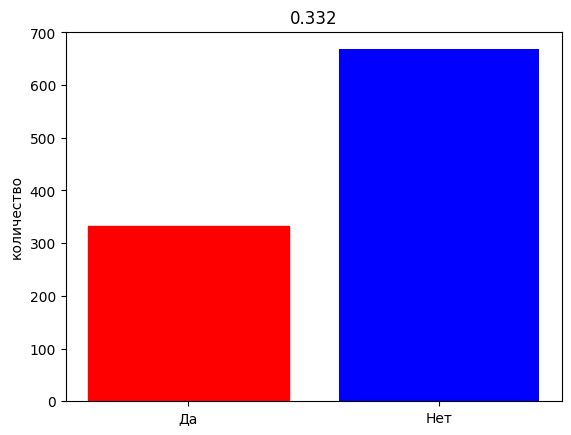

In [3]:
import scipy.stats as stats
from matplotlib import pyplot
import itertools
import numpy as np

M = 0
D = 1

def ttest(a , b):
    se = np.sqrt( a['SD']**2/a['N'] + b['SD']**2/b['N']  )
    t = (a['Mx'] - b['Mx'])/se
    dfreedom = a['N'] + b['N'] - 2
    return stats.t.sf(np.abs(t), dfreedom)*2

def false_alarm(m, n, a):
    trys = 1000 # количество экспериментов
    hist = {'Да':0, 'Нет':0} # результаты сравнений     
    data = list(range(m)) # инициализация групп с выборками
    
    # запускаем trys экспериментов
    for i in range(trys):
        
        # наполняем m выборок, для ускорения сразу их агрегируем по SD, Mx, N
        for j in range(m):
            dt = stats.norm.rvs(loc=M, scale=D, size=n)
            data[j] = {'SD':np.std(dt, ddof = 1), 'Mx':np.mean(dt), 'N':n}
        
        #сравниваем выборки по 2 группы, перебор можно реализовать с помощью двух циклов или воспользоваться itertools
        for first, second in itertools.combinations(data, 2):
            if ttest(first, second) <= a:
                hist['Да']+=1
                break
        else:
            hist['Нет']+=1

    # рисуем гитограмму частот
    barlist = pyplot.bar(hist.keys(), hist.values(), color='b')
    barlist[0].set_color('r')
    pyplot.title(round(hist['Да'] / trys,3))
    pyplot.ylabel('количество')
    pyplot.show()
    

false_alarm(3,30,0.15)